11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8793 - loss: 0.4310 - val_accuracy: 0.9540 - val_loss: 0.1465
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9622 - loss: 0.1251 - val_accuracy: 0.9738 - val_loss: 0.0937
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9768 - loss: 0.0783 - val_accuracy: 0.9741 - val_loss: 0.0861
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9835 - loss: 0.0559 - val_accuracy: 0.9777 - val_loss: 0.0702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9867 - loss: 0.0430 - val_accuracy: 0.9798 - val_loss: 0.0709
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9894 - loss: 0.0344 - val_accuracy: 0.9774 - val_loss: 0.0757
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9925 - loss: 0.0263 - val_accuracy: 0.9760 - val_loss: 0.0862
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0211

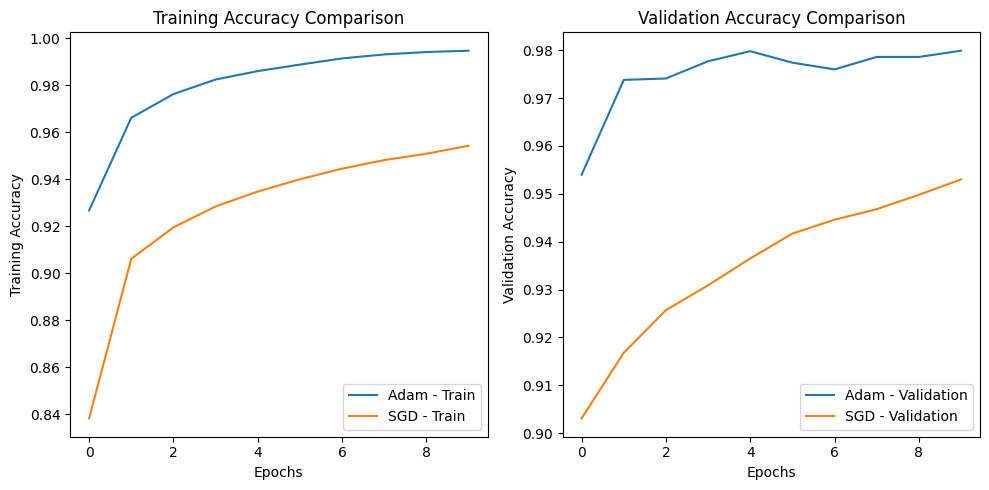

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (scale to [0,1] range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple neural network model
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 2: Train two models with Adam and SGD optimizers
adam_model = build_model(optimizer='adam')
sgd_model = build_model(optimizer='sgd')

# Train both models
adam_history = adam_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)
sgd_history = sgd_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

# Step 3: Compare training and validation accuracy trends
plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(adam_history.history['accuracy'], label='Adam - Train')
plt.plot(sgd_history.history['accuracy'], label='SGD - Train')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(adam_history.history['val_accuracy'], label='Adam - Validation')
plt.plot(sgd_history.history['val_accuracy'], label='SGD - Validation')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()

plt.tight_layout()
plt.show()
